In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# View the first few rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Basic info
print(df.info())

# Summary statistics
print(df.describe())

# Mean, median, std deviation for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Standard Deviation': df[numerical_cols].std()
})
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

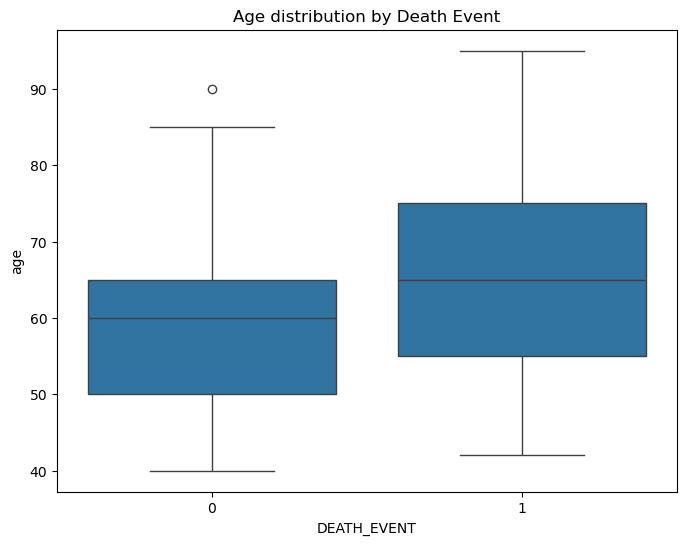

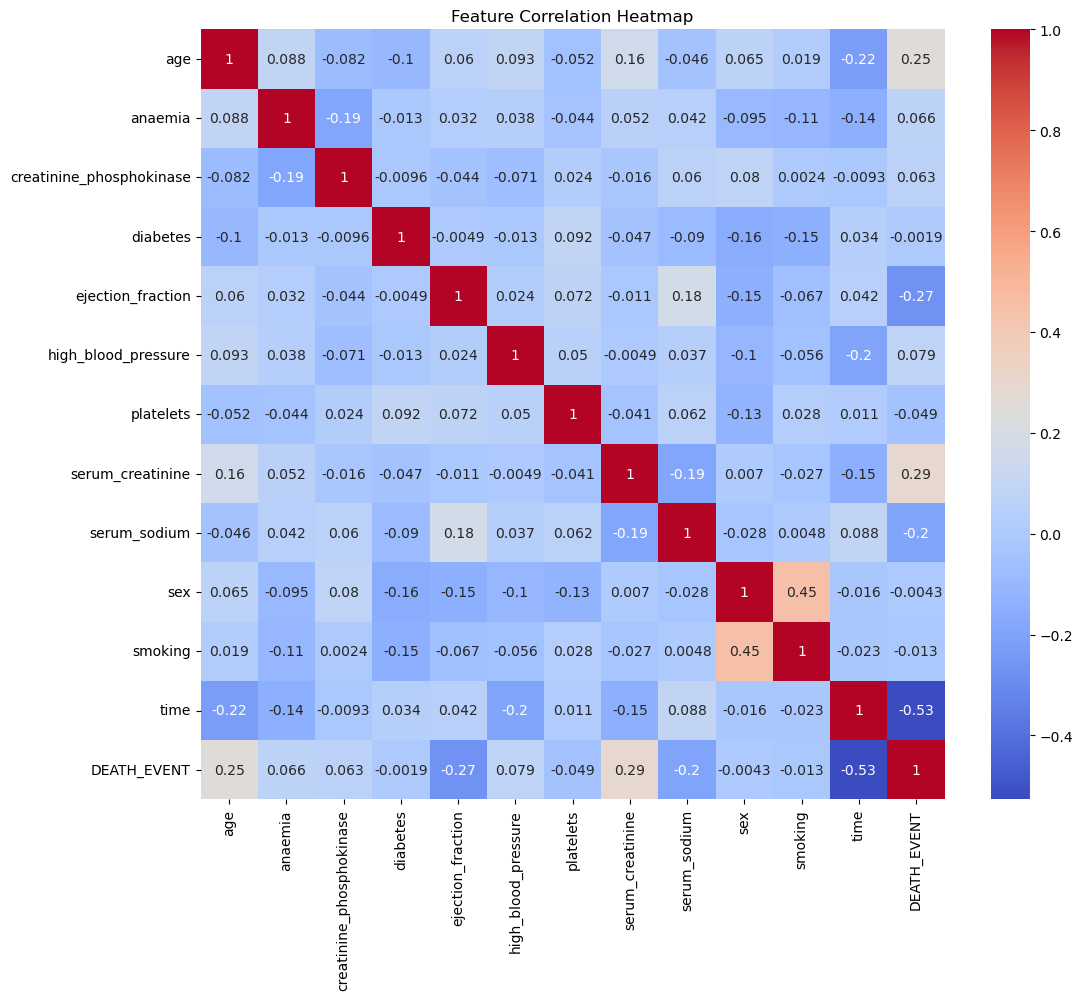

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot 1: Distribution of age vs DEATH_EVENT
plt.figure(figsize=(8,6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age distribution by Death Event')
plt.show()

# Plot 2: Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [5]:
# Check for missing values
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df_scaled.head())

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364      0.0                  0.071319       0.0           0.090909   
1  0.272727      0.0                  1.000000       0.0           0.363636   
2  0.454545      0.0                  0.015693       0.0           0.090909   
3  0.181818      1.0                  0.011227       0.0           0.090909   
4  0.454545      1.0                  0.017479       1.0           0.090909   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0   0.290823          0.157303      0.485714  1.0   
1                  0.0   0.288833          0.067416      0.657143  1.0   
2                  0.0   0.165960          0.089888      0.457143  1.0   
3                  0.0   0.224148          0.157303      0.685714  1.0   
4                  0.0   0.365984          0.247191      0.085714  0.0   

   smoking      time  DEATH_EVENT  
0      0.0  0.000000          1.0  
1      0

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Features and Target
X = df_scaled.drop('DEATH_EVENT', axis=1)
y = df_scaled['DEATH_EVENT']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)

C:\Users\puneetsharma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.3815 - loss: 0.7127 - val_accuracy: 0.7500 - val_loss: 0.6635
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7143 - loss: 0.6621 - val_accuracy: 0.7500 - val_loss: 0.6240
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6559 - loss: 0.6445 - val_accuracy: 0.7500 - val_loss: 0.5967
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7002 - loss: 0.6071 - val_accuracy: 0.7500 - val_loss: 0.5758
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6767 - loss: 0.6081 - val_accuracy: 0.7500 - val_loss: 0.5631
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7100 - loss: 0.5707 - val_accuracy: 0.7500 - val_loss: 0.5542
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6811 - loss: 0.5759 - val_accuracy: 0.7500 - val_loss: 0.5485
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6970 - loss: 0.5452 - val_accuracy: 0.7500 - v

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Accuracy: 0.77
Precision: 0.87
Recall: 0.52
F1 Score: 0.65


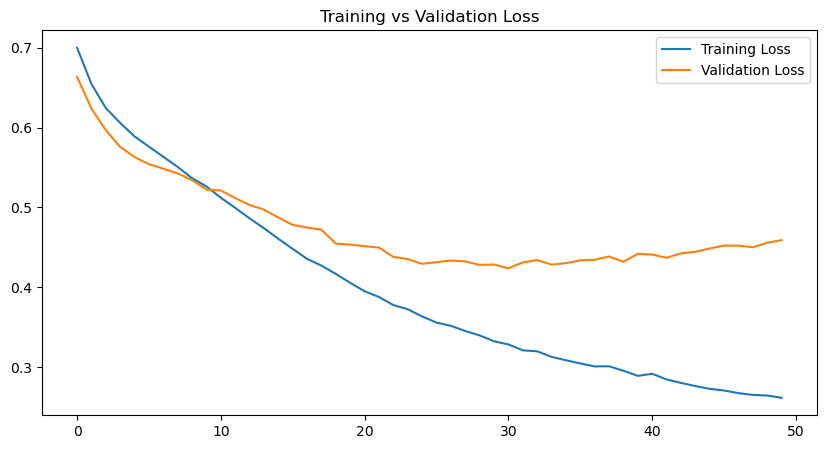

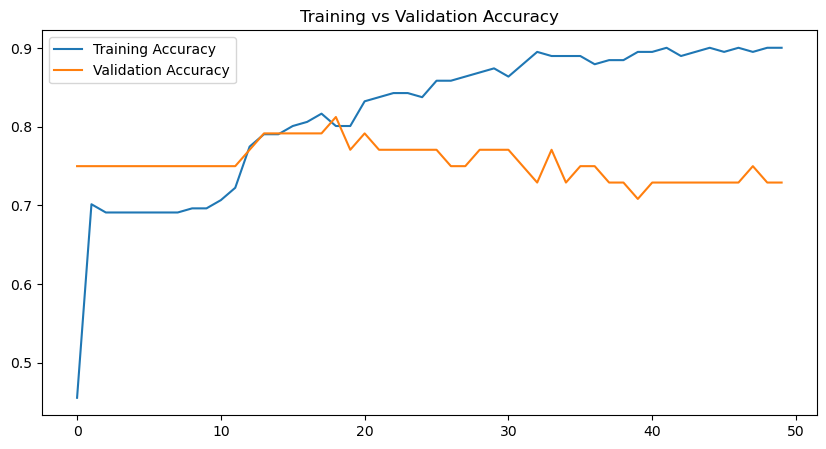

In [9]:
# Plot loss curve
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot accuracy curve
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [10]:
# Example: New optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

C:\Users\puneetsharma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.6046 - loss: 0.6756 - val_accuracy: 0.7292 - val_loss: 0.6335
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6729 - loss: 0.6496 - val_accuracy: 0.7917 - val_loss: 0.6123
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7069 - loss: 0.6333 - val_accuracy: 0.7708 - val_loss: 0.5940
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6529 - loss: 0.6386 - val_accuracy: 0.7500 - val_loss: 0.5804
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6732 - loss: 0.6160 - val_accuracy: 0.7500 - val_loss: 0.5673
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6772 - loss: 0.6078 - val_accuracy: 0.7500 - val_loss: 0.5563
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7062 - loss: 0.5828 - val_accuracy: 0.7500 - val_loss: 0.5470
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7299 - loss: 0.5545 - val_accuracy: 0.7500 - val_loss: 0.5395

In [ ]:
'''
Reducing learning rate slowed down convergence but stabilized the loss curve.
Larger batch size slightly reduced training noise but needed more epochs for convergence.
More neurons helped capture complex patterns but increased overfitting risk.
'''

In [ ]:
'''
Insights
Features like ejection_fraction, serum_creatinine, and age showed strong correlation with DEATH_EVENT.
Lower ejection fraction and higher creatinine levels are strong indicators of heart failure.

Recommendations
Improve model by applying dropout layers to prevent overfitting.
Try ensemble models like Random Forests for comparison.
Collect more samples or perform data augmentation if possible.
'''